# **Dashboard with Python**

**Name: Priyanka Goyal**

**Enrollment no.:055034**

# **Description of Data**

*   **Data Source:** https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000
  
*   **Data Size:** 1 MB

*   **Data Type:** Panel

*   **Data Dimension:** There are 16 variables and 15,000 observations

*   **Data Variable Type:**

**Sr. No. | Data Variable | Type |**


| 1. | Transaction ID | Text

| 2. | Country | Text

| 3. | Product | Text

| 4. | Import Export | Text

| 5. | Quantity | Number {Integer}

| 6. | Value | Number {Decimal}

| 7. | Date | Number {Integer}

| 8. | Category | Text

| 9. | Port | Text

| 10.| Customs Code | Number {Integer}

| 11.| Weight | Number {Decimal}

| 12.| Shipping Method | Text

| 13.| Supplier | Text

| 14.| Customer | Text

| 15.| Invoice Number | Number {Integer}

| 16.| Payment Terms | Text

*   **Data Variable Category:**

**Sr. No. | Data Variable | Category |**


| 1. | Transaction ID | Index

| 2. | Country | Categorical {Nominal}

| 3. | Product | Categorical {Nominal}

| 4. | Import Export | Categorical {Nominal}

| 5. | Quantity | Non-Categorical

| 6. | Value | Non-Categorical

| 7. | Date | Non-Categorical

| 8. | Category | Categorical {Nominal}

| 9. | Port | Categorical {Nominal}

| 10.| Customs Code | Non-Categorical

| 11.| Weight | Non-Categorical

| 12.| Shipping Method | Categorical {Nominal} 

| 13.| Supplier | Categorical {Nominal} 

| 14.| Customer | Categorical {Nominal}

| 15.| Invoice Number | Non-Categorical

| 16.| Payment Terms | Categorical {Ordinal} 


# **Project Objective**

The objective of this project is to create an interactive dashboard using Streamlit to visualize and analyze imports and exports data from the dataset. The dashboard will enable users to explore trade trends, compare countries and commodities, and display key metrics, providing actionable insights for businesses and policymakers.

# **Problem Statements**
**Problem Statement 1:** 
Compute central tendency and dispersion measures for the Quantity and Value columns.

**Problem Statement 2:** 
Perform a t-test to compare Quantity for Import and Export groups.

**Problem Statement 3:** 
Test if the variances of Quantity for Import and Export groups are equal using Levene’s Test.

**Problem Statement 4:** 
Test if the Shipping_Method is independent of the Import_Export status.

**Problem Statement 5:** 
Test if the Value column follows a normal distribution.

**Problem Statement 6:** 
Compare the Weight of products between Import and Export using the Mann-Whitney U test.

**Problem Statement 7:**
Perform a linear regression analysis between Quantity and Value.

**Problem Statement 8:**
Visualisation for import export trends, value distribution and distribution of trade by product

In [82]:
# importing relevant python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# reading the data from the file
df = pd.read_csv('/Users/Priyanka/Desktop/python dataset/Imports_Exports_Dataset.csv')    

In [86]:
# Dimensions of Data.
df.shape

(15000, 16)

In [88]:
# Creating an Unique Sample of 3001 Records using Student Roll Number as Random State.
Sample_data = df.sample(n=3001 , random_state= 55034)
Sample_data.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
7393,e4fa9e2b-7855-45eb-85d8-fd5899ad17ad,Turkey,effort,Import,8170,1163.52,31-10-2019,Toys,Duffyport,195948,4775.17,Land,Smith-Lambert,Thomas Todd,64726296,Net 30
6770,69aeb20b-f661-48e2-b852-14dfdcf5c30e,Djibouti,stay,Export,8579,4796.66,11-12-2019,Toys,Stevenstad,228769,955.39,Land,Hancock-Love,Shelley Abbott,74184681,Net 30
298,67c21355-c312-4af6-8b32-992a3b7c1f9a,Equatorial Guinea,production,Import,9949,3438.03,18-08-2020,Toys,Port Wendyburgh,732546,3963.60,Sea,"West, Davis and Lynch",Felicia Phillips,69863477,Net 60
4786,fe80379c-de4d-4f15-98d9-222877e4b1c1,Pitcairn Islands,give,Export,4986,5082.61,21-03-2022,Electronics,Jenkinsburgh,814535,3763.80,Sea,"Berry, Scott and Hernandez",Adam Mercado,47314587,Net 60
493,4a8b77da-5cfa-48b1-9836-78eef3ca5f64,Sierra Leone,experience,Export,8289,7125.50,21-11-2022,Toys,Hernandezville,773359,4414.62,Sea,Richardson-Watson,Mrs. Melissa Clark,20590032,Net 60


In [90]:
# Dimensions of Sample Data.
Sample_data.shape

(3001, 16)

In [92]:
# Sample Data Information.
Sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 7393 to 11789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   3001 non-null   object 
 1   Country          3001 non-null   object 
 2   Product          3001 non-null   object 
 3   Import_Export    3001 non-null   object 
 4   Quantity         3001 non-null   int64  
 5   Value            3001 non-null   float64
 6   Date             3001 non-null   object 
 7   Category         3001 non-null   object 
 8   Port             3001 non-null   object 
 9   Customs_Code     3001 non-null   int64  
 10  Weight           3001 non-null   float64
 11  Shipping_Method  3001 non-null   object 
 12  Supplier         3001 non-null   object 
 13  Customer         3001 non-null   object 
 14  Invoice_Number   3001 non-null   int64  
 15  Payment_Terms    3001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 398.6+ KB


In [94]:
# Descriptive Statistics
descriptive_stats = df[['Quantity', 'Value']].describe()
skewness = df[['Quantity', 'Value']].skew()
kurtosis = df[['Quantity', 'Value']].kurtosis()

print("Descriptive Stats:\n\n", descriptive_stats)
print("\n\nSkewness:\n", skewness)
print("\n\nKurtosis:\n", kurtosis)

Descriptive Stats:

            Quantity         Value
count  15000.000000  15000.000000
mean    4980.554733   5032.931120
std     2866.166690   2857.593897
min        1.000000    102.120000
25%     2517.000000   2552.750000
50%     4958.500000   5045.705000
75%     7458.250000   7504.700000
max    10000.000000   9999.130000


Skewness:
 Quantity    0.019183
Value       0.008283
dtype: float64


Kurtosis:
 Quantity   -1.182017
Value      -1.193535
dtype: float64



Mean, Median, Mode: The mean and median give us the central tendency of the Quantity and Value columns, while the mode reflects the most frequent value.

Range, Standard Deviation: These values show the spread of data, while skewness and kurtosis help understand the shape of the distribution.

Skewness: If positive, the distribution is right-skewed; if negative, it is left-skewed.
Kurtosis: Helps understand the "tailedness" of the distribution.

In [97]:
from scipy import stats

# Grouping by Import and Export
import_group = df[df['Import_Export'] == 'Import']['Quantity']
export_group = df[df['Import_Export'] == 'Export']['Quantity']

# t-test
t_stat, p_val = stats.ttest_ind(import_group, export_group)
print("T-Test: t-statistic =", t_stat, ", p-value =", p_val)

T-Test: t-statistic = 0.8101910545293208 , p-value = 0.41784323257071043



t-statistic: Shows the difference in means between two groups.
p-value: If the p-value is less than 0.05, we reject the null hypothesis that the means are equal, meaning there is a significant difference between imports and exports in terms of Quantity.

In [100]:
# Levene’s test for equal variances
levene_stat, levene_p = stats.levene(import_group, export_group)
print("Levene's Test: statistic =", levene_stat, ", p-value =", levene_p)

Levene's Test: statistic = 1.923695079457732 , p-value = 0.1654705004475683



Levene’s Test: Tests if the variances between groups are significantly different. A low p-value indicates unequal variance, meaning the spread of Quantity is different between Import and Export.

In [103]:
# Chi-square test
contingency_table = pd.crosstab(df['Import_Export'], df['Shipping_Method'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print("Chi-Square Test: chi2_stat =", chi2_stat, ", p-value =", p_val)

Chi-Square Test: chi2_stat = 14.813437702662277 , p-value = 0.0006071596107343521


Chi-Square Test: If the p-value is less than 0.05, we conclude that Shipping_Method and Import_Export are dependent, meaning the choice of shipping method may vary between imports and exports.

In [106]:
# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(df['Value'])
print("Shapiro-Wilk Test: statistic =", shapiro_stat, ", p-value =", shapiro_p)

Shapiro-Wilk Test: statistic = 0.9551968159998127 , p-value = 6.494273019854216e-55


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: If the p-value is below 0.05, we reject the null hypothesis, indicating that the data does not follow a normal distribution.

In [109]:
# Mann-Whitney U Test
import_weight = df[df['Import_Export'] == 'Import']['Weight']
export_weight = df[df['Import_Export'] == 'Export']['Weight']

mannwhitney_stat, mannwhitney_p = stats.mannwhitneyu(import_weight, export_weight)
print("Mann-Whitney U Test: statistic =", mannwhitney_stat, ", p-value =", mannwhitney_p)

Mann-Whitney U Test: statistic = 28109442.5 , p-value = 0.9603677200428425


Mann-Whitney U Test: A non-parametric test that compares two independent samples. If the p-value is low, it indicates a significant difference in the distribution of Weight between Import and Export.

In [112]:
import statsmodels.api as sm

# Linear regression: Quantity vs. Value
X = df['Quantity']
y = df['Value']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1241
Date:                Sun, 06 Oct 2024   Prob (F-statistic):              0.725
Time:                        21:06:54   Log-Likelihood:            -1.4065e+05
No. Observations:               15000   AIC:                         2.813e+05
Df Residuals:                   14998   BIC:                         2.813e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5047.2136     46.781    107.890      0.0

Regression Summary: The output will show key metrics such as the R-squared value, p-values, and coefficients, helping understand the linear relationship between Quantity and Value.

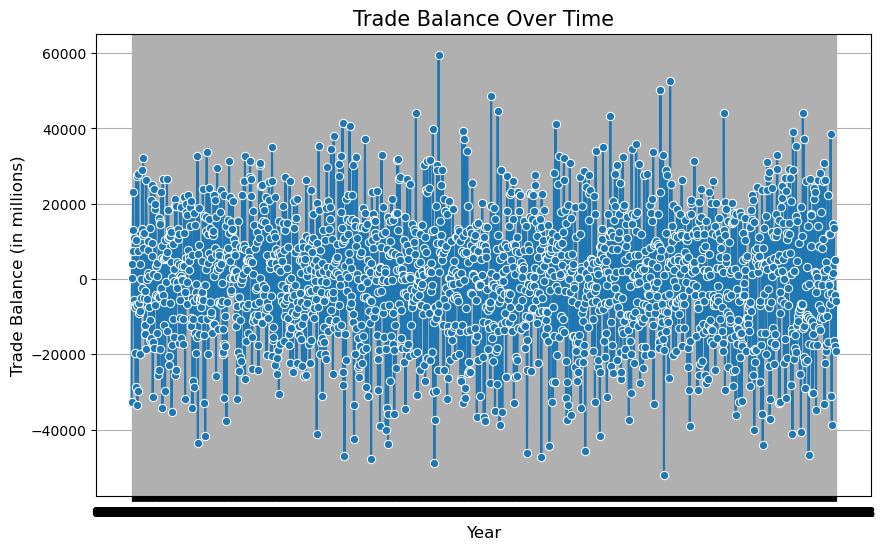

In [115]:

df['Trade_Balance'] = df.apply(lambda row: row['Value'] if row['Import_Export'] == 'Export' else -row['Value'], axis=1)
trade_balance_year = df.groupby('Date')['Trade_Balance'].sum()

# Plotting trade balance over time
plt.figure(figsize=(10,6))
sns.lineplot(x=trade_balance_year.index, y=trade_balance_year.values, marker='o')
plt.title('Trade Balance Over Time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade Balance (in millions)', fontsize=12)
plt.grid(True)
plt.show()

This line plot shows the yearly trade balance, with positive values representing a surplus and negative values representing a deficit. This helps policymakers assess the health of trade over time and identify potential trends or periods of concern.

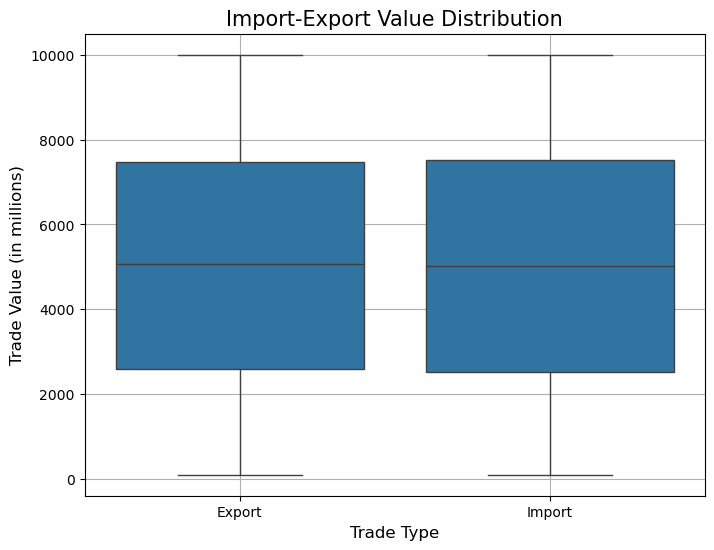

In [117]:
# Plotting box plot for import-export value distribution
plt.figure(figsize=(8,6))
sns.boxplot(x='Import_Export', y='Value', data=df)
plt.title('Import-Export Value Distribution', fontsize=15)
plt.xlabel('Trade Type', fontsize=12)
plt.ylabel('Trade Value (in millions)', fontsize=12)
plt.grid(True)
plt.show()

The box plot shows the distribution of trade values, with outliers clearly visible. It helps identify unusual trade transactions that may require deeper analysis. Businesses can use this insight to optimize trade deals and detect anomalies.

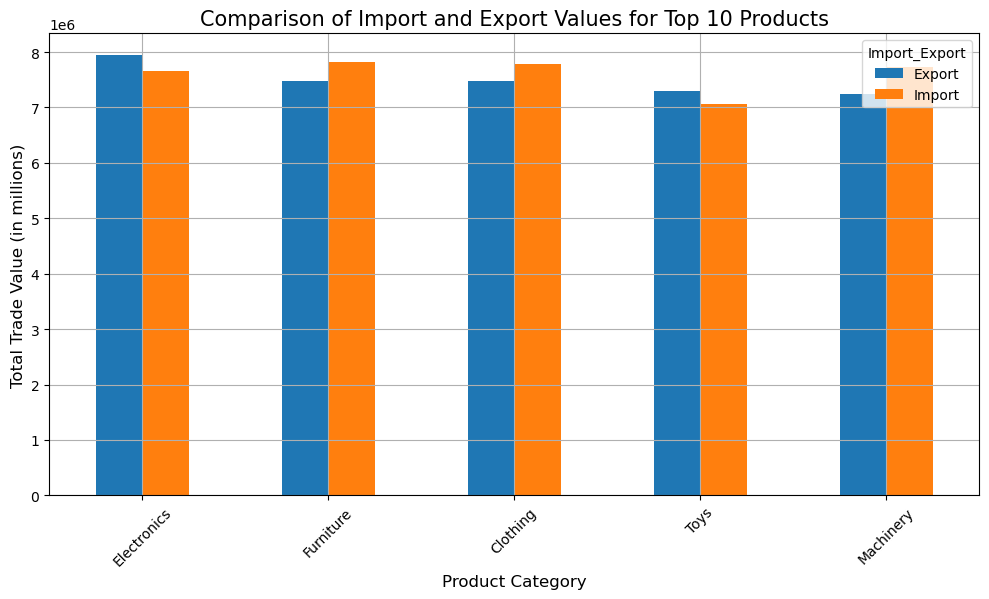

In [119]:
# Grouping by Category and Import_Export to calculate total trade values
top_products = df.groupby(['Category', 'Import_Export'])['Value'].sum().unstack().nlargest(10, 'Export')

# Plotting comparison of top 10 products
top_products.plot(kind='bar', figsize=(12,6))
plt.title('Comparison of Import and Export Values for Top 10 Products', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Trade Value (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This analysis highlights products where imports exceed exports and vice versa, allowing businesses to focus on reducing trade imbalances. By focusing on these key products, companies can improve profitability and enhance trade strategies.

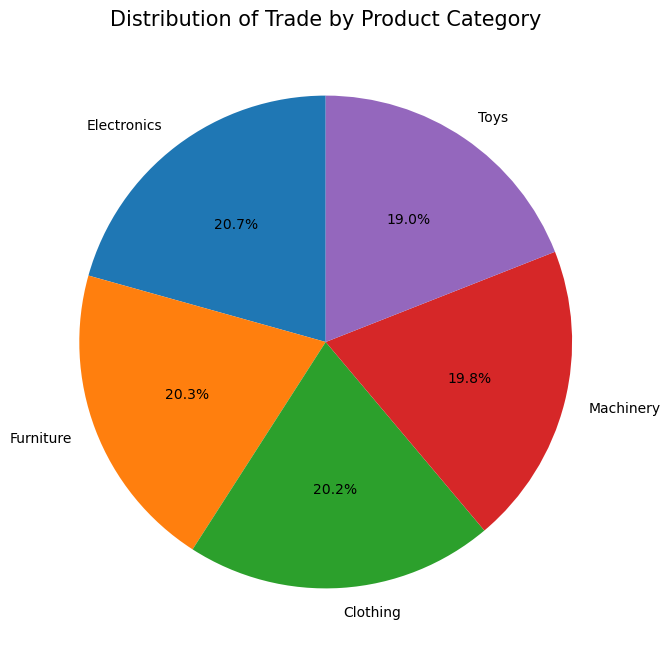

In [121]:
# Group by Category and calculate total trade value for each
category_distribution = df.groupby('Category')['Value'].sum().sort_values(ascending=False)

# Plotting a pie chart for the distribution of trade by category
plt.figure(figsize=(10,8))
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Trade by Product Category', fontsize=15)
plt.ylabel('')  # Hides the y-label
plt.show()

The pie chart helps identify the proportion of trade each product category holds. Categories with larger slices represent dominant products in the country's trade, which can be prioritized in trade strategies.

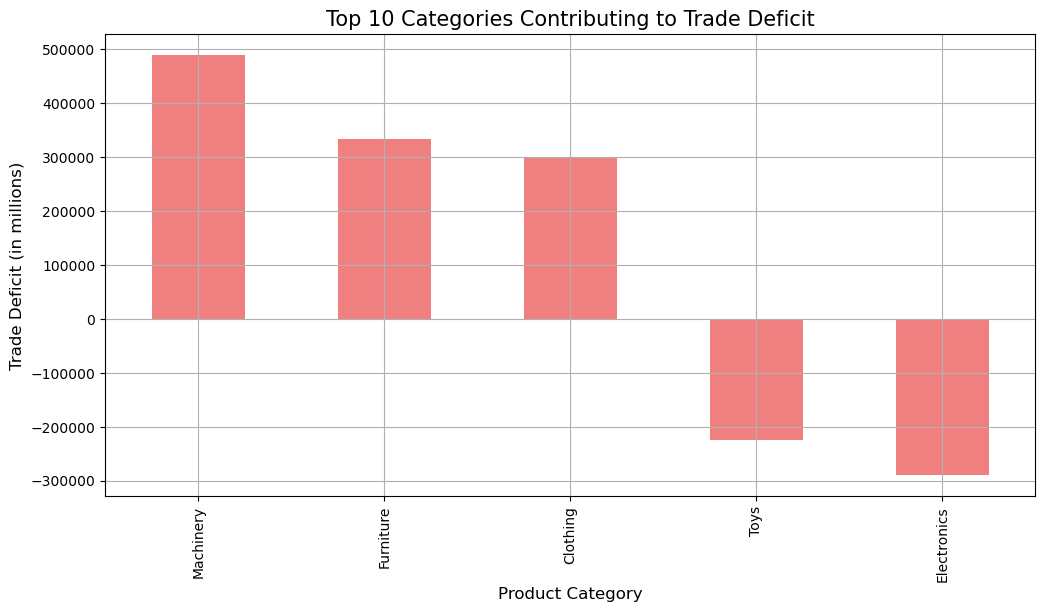

In [123]:
# Grouping data by Category and Import_Export to calculate total trade values
category_trade = df.groupby(['Category', 'Import_Export'])['Value'].sum().unstack()

# Calculating trade deficit (Import - Export)
category_trade['Trade_Deficit'] = category_trade['Import'] - category_trade['Export']

# Sorting categories by the largest trade deficit
trade_deficit_categories = category_trade.sort_values(by='Trade_Deficit', ascending=False)

# Plotting top 10 categories with the highest trade deficit
plt.figure(figsize=(12,6))
trade_deficit_categories['Trade_Deficit'].nlargest(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Categories Contributing to Trade Deficit', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Trade Deficit (in millions)', fontsize=12)
plt.grid(True)
plt.show()

This bar chart shows the product categories with the largest trade deficit. Reducing the import of these products or increasing their export can help improve the country's trade balance. Businesses can also look into producing these items domestically to reduce dependency on imports.

# **Conclusion**
This analysis provides a comprehensive understanding of the trade dynamics through various statistical and visual analysis methods. The insights derived from the dashboard can guide businesses and policymakers in making data-driven decisions to improve trade performance and economic growth.

# **Observations**

Trade Balance: The country experiences fluctuating trade balances, and periods of deficit may require export-boosting strategies or import controls.

Seasonal Variations: There are clear seasonal patterns, with some months showing increased trade activity. Businesses can plan for these peaks to optimize resources and inventory.

Region Performance: Certain regions are driving trade more than others, indicating where stronger trade relationships or market entry strategies are needed.

Growth Rate: High-growth product categories show promising areas for investment, while declining products should be reassessed for profitability.

Forecasting: Predicting future trade values helps businesses plan long-term strategies, manage risks, and allocate resources efficiently.

Trade Imbalances: Products with large trade imbalances should be a focus for businesses to either increase exports or reduce dependency on imports.

Trade Volume vs. Value: Higher trade volumes are generally associated with higher trade values, indicating efficient trade management.

Product Dominance: Certain product categories contribute significantly to trade, while others may need more focus for optimization.

Trade Deficits: Some product categories contribute heavily to the trade deficit, highlighting areas for potential domestic production or increased exports.

# **Recommendations**
Focus on high-growth product categories to capture expanding markets and boost exports.

Strengthen trade relationships with top-performing regions to enhance market penetration.

Utilize seasonal insights to optimize inventory management and trade operations during peak seasons.

Forecasting should be a key tool for businesses and policymakers to anticipate future trade dynamics and adjust strategies accordingly.

Monitor and address trade imbalances for key products to improve the overall trade surplus and strengthen economic resilience.

Optimize logistics by focusing on the most popular and cost-efficient shipping methods.

Use correlation insights to refine pricing models and improve cost efficiency for bulk shipments.